In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch


In [2]:
#read image
img = cv2.imread('../IMG_0014.jpg')

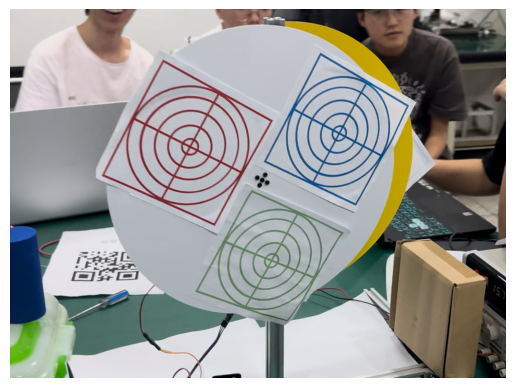

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

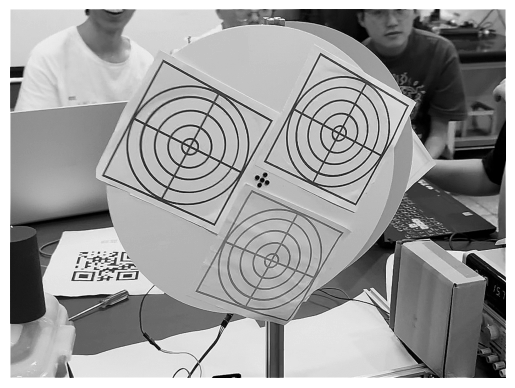

In [4]:
# Define the convolution kernel
kernel = torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Setup the convolution operation
conv = torch.nn.Conv2d(1, 1, kernel_size=3, bias=False, padding=1)
conv.weight.data = kernel

# Load and prepare the image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = img_gray.astype(np.float32) / 255  # Normalize the image

# Convert to torch tensor and add batch and channel dimensions
img_tensor = torch.tensor(img_gray).unsqueeze(0).unsqueeze(0)

# Perform the convolution
img_conv = conv(img_tensor)

# Prepare the image for display
img_conv = img_conv.squeeze().detach().numpy() * 255  # Squeeze, detach from PyTorch, and scale to 0-255
img_conv = np.clip(img_conv, 0, 255).astype(np.uint8)  # Clip values to ensure they remain within valid range

# Display the result
plt.imshow(img_conv, cmap='gray')
plt.axis('off')
plt.show()


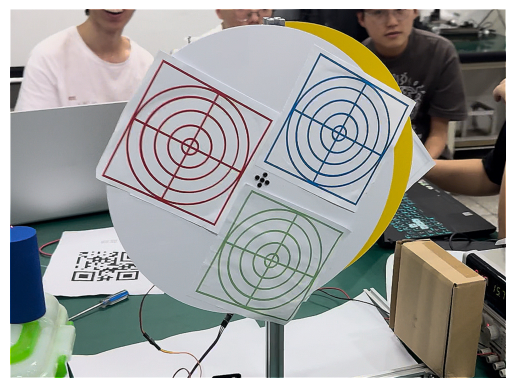

In [5]:
# 定义卷积核和卷积操作
kernel = torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
conv = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
conv.weight.data = kernel

# 加载图像并分通道处理
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV 默认使用 BGR，转换为 RGB
channels = [img_rgb[:, :, i].astype(np.float32) / 255 for i in range(3)]  # 分离通道并归一化

# 对每个通道应用卷积
convoluted_channels = []
for channel in channels:
    input_tensor = torch.tensor(channel).unsqueeze(0).unsqueeze(0)
    convoluted_channel = conv(input_tensor)
    convoluted_channel = convoluted_channel.squeeze().detach().numpy() * 255
    convoluted_channel = np.clip(convoluted_channel, 0, 255).astype(np.uint8)
    convoluted_channels.append(convoluted_channel)

# 重新组合通道
img_conv = np.stack(convoluted_channels, axis=2)

# 显示结果
plt.imshow(img_conv)
plt.axis('off')
plt.show()

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


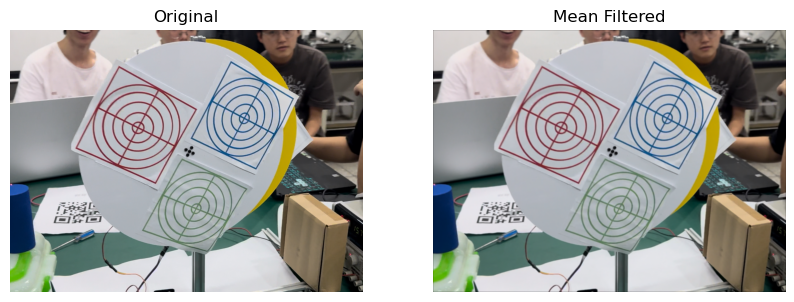

In [7]:
# mean filter
# Define the mean filter kernel
kernel = torch.ones(3, 3, dtype=torch.float32) / 9

# apply the mean filter to each channel
mean_filtered_channels = []
for channel in channels:
    input_tensor = torch.tensor(channel).unsqueeze(0).unsqueeze(0)
    mean_filtered_channel = torch.nn.functional.conv2d(input_tensor, kernel.unsqueeze(0).unsqueeze(0), padding=1)
    mean_filtered_channel = mean_filtered_channel.squeeze().detach().numpy() * 255
    mean_filtered_channel = np.clip(mean_filtered_channel, 0, 255).astype(np.uint8)
    mean_filtered_channels.append(mean_filtered_channel)
    
img_mean = np.stack(mean_filtered_channels, axis=2)

# 显示原始和滤波后的图像
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(img_mean), plt.title('Mean Filtered'), plt.axis('off')
plt.show()


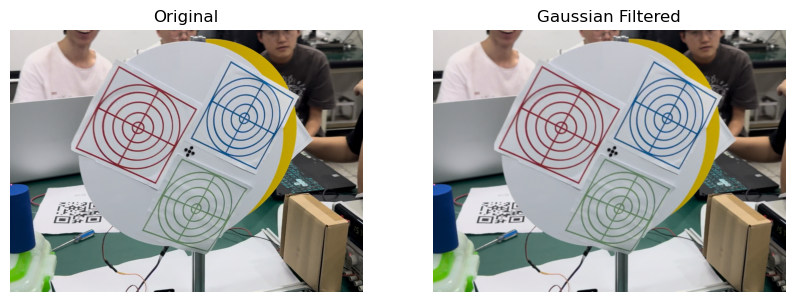

In [8]:
# 创建高斯核
ksize = 3  # 核的大小
sigma = 1  # 标准差
kernel_x = cv2.getGaussianKernel(ksize, sigma)
gaussian_kernel = kernel_x * kernel_x.T  # 创建二维高斯核
# 应用高斯滤波
img_filtered = cv2.filter2D(img, -1, gaussian_kernel)

# 显示原始和滤波后的图像
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(img_filtered), plt.title('Gaussian Filtered'), plt.axis('off')
plt.show()

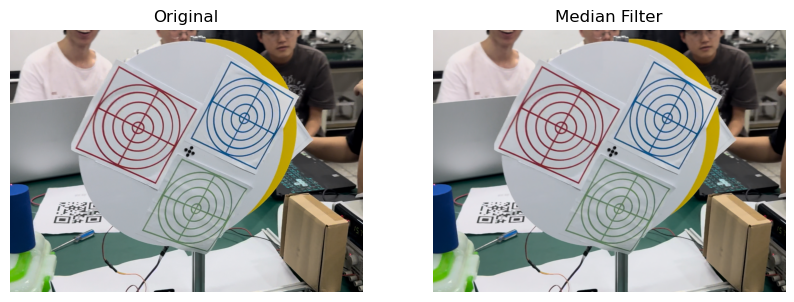

In [9]:
# 中值滤波
kernel_size = 3
img_median = cv2.medianBlur(img, kernel_size)
# 显示原始和滤波后的图像
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(img_median), plt.title('Median Filter'), plt.axis('off')
plt.show()


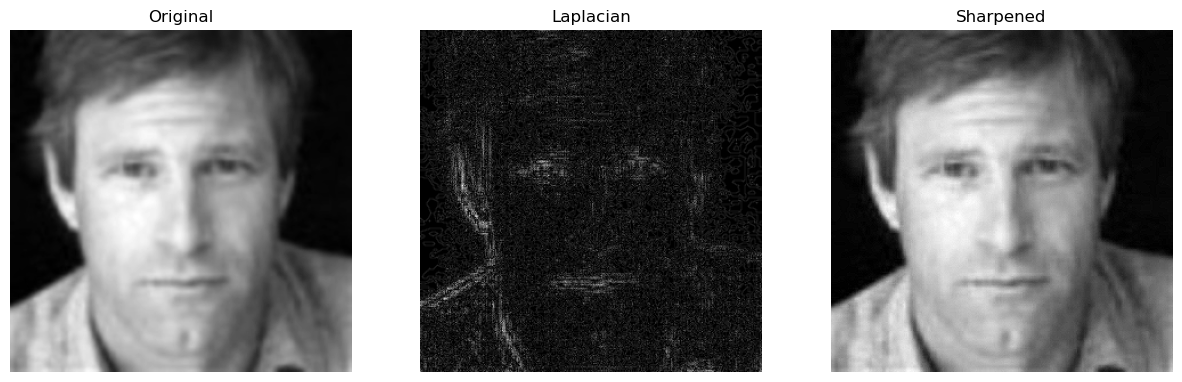

In [15]:
img_lowres = cv2.imread('low_respic.jpg',cv2.IMREAD_GRAYSCALE)

# 应用拉普拉斯滤波器，并确保使用相同的数据类型
laplacian = cv2.Laplacian(img_lowres, cv2.CV_64F)  # 使用64位浮点型防止数据溢出
img_float = img_lowres.astype(np.float64)  # 将原图像转换为64位浮点型

# 计算锐化图像
sharpened_img = cv2.subtract(img_float, laplacian)  # 确保两个操作数都是float64

# 将结果转换为8位图像显示
sharpened_img = np.clip(sharpened_img, 0, 255)  # 限制数值范围以避免数据溢出
sharpened_img = np.uint8(sharpened_img)
laplacian = np.uint8(np.absolute(laplacian))  # 转换为8位整型并取绝对值

# 显示图像
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img_lowres, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(132), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian'), plt.axis('off')
plt.subplot(133), plt.imshow(sharpened_img, cmap='gray'), plt.title('Sharpened'), plt.axis('off')
plt.show()

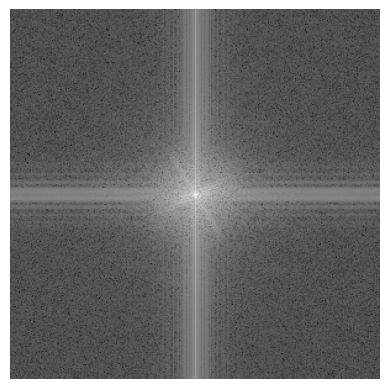

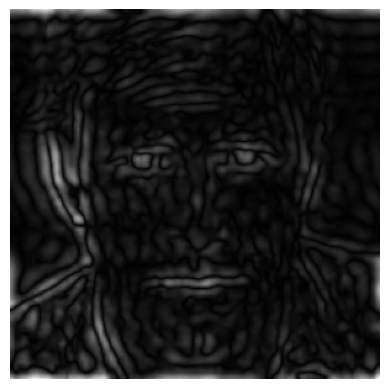

In [18]:
# 对lowres图像应用傅立叶变换
f = np.fft.fft2(img_lowres)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()
# 滤掉低频信号
rows, cols = img_lowres.shape
crow, ccol = rows // 2, cols // 2
fshift[crow - 10:crow + 10, ccol - 10:ccol + 10] = 0
# 逆变换
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
# 显示结果
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()
